In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import sklearn.metrics
import scipy.stats
import networkx as nx
import pickle
import copy
import fortuna
sns.set()
sns.set_style("white")

from perses.analysis import load_simulations,cycles

import itertools
import os

#######################
# THINGS FOR STYLE
#######################
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

rainbow_cmap = plt.cm.get_cmap('gist_rainbow')    
green_cmap = plt.cm.get_cmap('Greens')
    
base_directory = os.getcwd()

In [2]:
class Thrombin(object):
    name = 'Thrombin'
    thrombin = ['1b','1d','3b','1a','6a','7a','3a','5','6b','6e','1c']
    base_id = 3
    base_bfe = -7.48
    name_to_index = {}
    index_to_name = {}
    for i,lig in enumerate(thrombin):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('1d','6e'),('1d','5'),('1b','3b'),('6a','1b'),('1b','1c'),('1d','1c'),('1b','1a'),('1a','5'),('3a','1d'),('6a','6b'),('1d','7a'),('1b','7a'),('3a','1b'),('1d','1a'),('1a','3b'),('6e','6b')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))

    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None

class Mcl1(object):
    name = 'Mcl1'
    mcl1 = ['26','48','33','46','35','31','52','68','32','38','51','50','28','66','39','37','30','54','44','23','29','40','62','61','49','64','41','65','58','63','27','47','57','56','53','36','60','45','42','67','34','43']
    name_to_index = {}
    index_to_name = {}
    base_id = 19
    base_bfe = -8.83
    for i,lig in enumerate(mcl1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('50','60'), ('56','35'), ('65','60'), ('26','57'), ('58','60'), ('62','45'), ('60','36'), ('30','27'), ('33','27'), ('43','27'), ('67','58'), ('67','32'), ('30','40'), ('38','60'), ('41','35'), ('54','23'), ('56','60'), ('66','42'), ('29','40'), ('26','44'), ('49','35'), ('29','35'), ('42','51'), ('39','32'), ('35','37'), ('28','35'), ('35','53'), ('67','63'), ('27','45'), ('41','32'), ('67','53'), ('35','33'), ('27','46'), ('66','23'), ('67','61'), ('57','23'), ('30','35'), ('61','60'), ('67','31'), ('32','46'), ('35','60'), ('31','35'), ('62','26'), ('35','36'), ('26','64'), ('38','35'), ('35','34'), ('29','27'), ('48','27'), ('68','45'), ('63','60'), ('54','42'), ('44','23'), ('28','27'), ('67','27'), ('52','60'), ('27','23'), ('49','67'), ('28','47'), ('67','52'), ('30','48'), ('67','35'), ('32','34'), ('65','67'), ('67','50'), ('35','39'), ('43','47'), ('67','37'), ('42','64'), ('51','45'), ('68','23')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None

class Bace(object):
    name = 'Bace'
    bace = ['CAT-13f','CAT-13d','CAT-4c','CAT-13b','CAT-4l','CAT-13m','CAT-4k','CAT-13n','CAT-13o','CAT-13a','CAT-13k','CAT-17a','CAT-17f','CAT-13i','CAT-17d','CAT-13c','CAT-17c','CAT-24','CAT-17i','CAT-13g','CAT-4j','CAT-17b','CAT-4p','CAT-17h','CAT-4b','CAT-17g','CAT-4d','CAT-4m','CAT-13e','CAT-4n','CAT-4o','CAT-4a','CAT-13j','CAT-13h','CAT-4i','CAT-17e']
    name_to_index = {}
    index_to_name = {}
    base_id = 9
    base_bfe = -8.83
    for i,lig in enumerate(bace):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('CAT-13b','CAT-17g'), ('CAT-13a','CAT-17g'), ('CAT-13e','CAT-17g'), ('CAT-4m','CAT-4c'), ('CAT-13k','CAT-4d'), ('CAT-24','CAT-17e'), ('CAT-13g','CAT-17g'), ('CAT-13d','CAT-13h'), ('CAT-13a','CAT-17i'), ('CAT-4m','CAT-13j'), ('CAT-13a','CAT-13m'), ('CAT-4l','CAT-13k'), ('CAT-13o','CAT-17i'), ('CAT-4c','CAT-4o'), ('CAT-4j','CAT-4o'), ('CAT-4i','CAT-13m'), ('CAT-24','CAT-17i'), ('CAT-13j','CAT-4o'), ('CAT-4n','CAT-13k'), ('CAT-4o','CAT-4b'), ('CAT-17i','CAT-13f'), ('CAT-17c','CAT-17e'), ('CAT-13k','CAT-4b'), ('CAT-4m','CAT-4j'), ('CAT-13n','CAT-13k'), ('CAT-13d','CAT-17h'), ('CAT-17b','CAT-13d'), ('CAT-4m','CAT-4n'), ('CAT-4m','CAT-13k'), ('CAT-13c','CAT-17i'), ('CAT-4a','CAT-4o'), ('CAT-13h','CAT-17i'), ('CAT-4o','CAT-4d'), ('CAT-17g','CAT-17c'), ('CAT-4a','CAT-13k'), ('CAT-13d','CAT-17d'), ('CAT-17g','CAT-17f'), ('CAT-13e','CAT-17i'), ('CAT-13d','CAT-13b'), ('CAT-17g','CAT-13i'), ('CAT-4m','CAT-13m'), ('CAT-17g','CAT-13c'), ('CAT-17i','CAT-17a'), ('CAT-13d','CAT-13f'), ('CAT-17f','CAT-17e'), ('CAT-13d','CAT-17a'), ('CAT-17g','CAT-17d'), ('CAT-13n','CAT-13a'), ('CAT-13o','CAT-17h'), ('CAT-17b','CAT-17e'), ('CAT-4k','CAT-4o'), ('CAT-4m','CAT-4l'), ('CAT-4m','CAT-4k'), ('CAT-13n','CAT-4i'), ('CAT-13g','CAT-17i'), ('CAT-4p','CAT-13k'), ('CAT-4m','CAT-4p'), ('CAT-13d','CAT-13i')]    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None        

class Jnk1(object):
    name = 'Jnk1'
    jnk1 = ['18629-1','18634-1','18628-1','18660-1','18624-1','18633-1','18635-1','17124-1','18625-1','18659-1','18637-1','18638-1','18652-1','18627-1','18658-1','18630-1','18639-1','18631-1','18632-1','18636-1','18626-1']
    name_to_index = {}
    index_to_name = {}
    base_id = 7
    base_bfe = -9.68
    for i,lig in enumerate(jnk1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('17124-1','18634-1'), ('18626-1','18624-1'), ('18636-1','18625-1'), ('18632-1','18624-1'), ('18635-1','18625-1'), ('18626-1','18658-1'), ('18639-1','18658-1'), ('18626-1','18625-1'), ('18638-1','18658-1'), ('18628-1','18624-1'), ('18631-1','18660-1'), ('18638-1','18634-1'), ('18626-1','18632-1'), ('18626-1','18630-1'), ('18631-1','18624-1'), ('18629-1','18627-1'), ('18634-1','18637-1'), ('18626-1','18627-1'), ('18631-1','18652-1'), ('18637-1','18631-1'), ('18626-1','18634-1'), ('18633-1','18624-1'), ('17124-1','18631-1'), ('18627-1','18630-1'), ('18659-1','18634-1'), ('18636-1','18624-1'), ('18626-1','18628-1'), ('18626-1','18660-1'), ('18626-1','18659-1'), ('18639-1','18634-1'), ('18635-1','18624-1')]
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None  
        
class Tyk2(object):
    name = 'Tyk2'
    tyk2 = []
    name_to_index = {}
    index_to_name = {}
    base_id = 19
    base_bfe = -9.54
    for i,lig in enumerate(tyk2):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = []
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None  

class Cdk2(object):
    name = 'Cdk2'
    cdk2 = ['30','28' ,'1oiy' ,'1oi9' ,'32' ,'1oiu' ,'29' ,'1h1r' ,'21' ,'26' ,'1h1s' ,'31' ,'20' ,'22' ,'17' ,'1h1q']
    name_to_index = {}
    index_to_name = {}
    base_id = 14
    base_bfe = -7.04
    for i,lig in enumerate(cdk2):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('22','1h1r') ,('17','1h1q') ,('17','21') ,('17','22') ,('20','1h1q') ,('26','1h1q') ,('26','1oi9') ,('28','26') ,('28','31') ,('29','26') ,('30','26') ,('30','31') ,('31','32') ,('1h1r','1oi9') ,('1h1r','21') ,('1h1s','1oiy') ,('1h1s','26') ,('1oi9','20') ,('1oiu','26') ,('1oiu','1h1q') ,('1oiy','1oi9') ,('1oiy','32') ,('1oiy','29') ,('1oiy','31') ,('1oiy','1h1q')]
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None          
        
def check_missing_results(target,all_sims):
    still_to_run = copy.deepcopy(target.index_pairs)
    for sim in all_sims:
        lig_id_a = int(sim.ligA)
        lig_id_b = int(sim.ligB)
        still_to_run.remove((lig_id_a,lig_id_b))
    return still_to_run
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 Thrombin 
3
1a
-7.48
There are 0 simulations left to run: []


/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


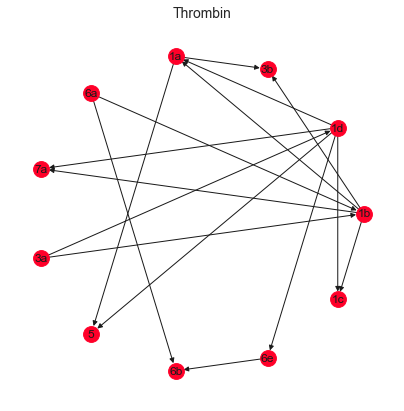

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Absolutes
1b, -8.57
1d, -8.89
3b, -7.18
1a, -7.48
6a, -9.81
7a, -7.94
3a, -7.83
5, -6.98
6b, -8.96
6e, -9.70
1c, -9.21



 Mcl1 
19
23
-8.83
There are 0 simulations left to run: []


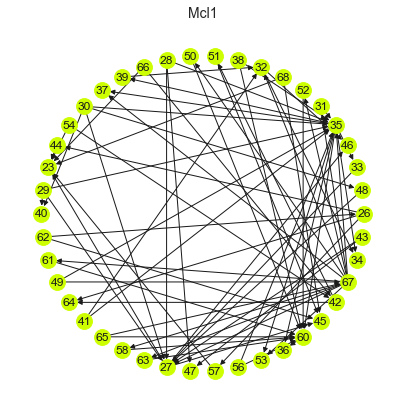

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Absolutes
26, -9.20
48, -3.83
33, -9.31
46, -8.12
35, -9.82
31, -8.09
52, -11.76
68, -8.01
32, -7.84
38, -11.24
51, -8.82
50, -11.51
28, -7.23
66, -10.14
39, -8.23
37, -11.70
30, -7.98
54, -10.57
44, -9.59
23, -8.83
29, -7.01
40, -8.89
62, -8.79
61, -11.76
49, -10.28
64, -10.50
41, -10.26
65, -13.33
58, -14.21
63, -14.01
27, -7.50
47, -7.44
57, -8.85
56, -11.11
53, -14.03
36, -9.66
60, -12.05
45, -10.19
42, -8.38
67, -12.51
34, -9.47
43, -8.02



 Bace 
9
CAT-13a
-8.83
There are 13 simulations left to run: [(9, 25), (28, 25), (19, 25), (8, 18), (30, 24), (18, 0), (15, 18), (28, 18), (25, 13), (25, 15), (1, 0), (19, 18), (1, 13)]


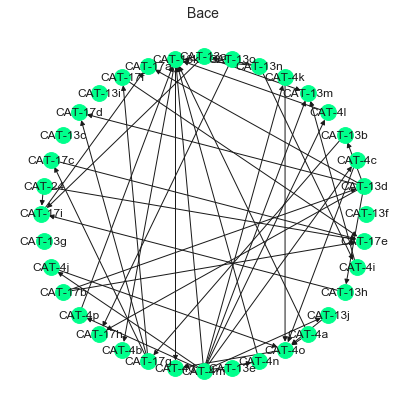

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Absolutes
CAT-13f, -9.20
CAT-13d, -10.69
CAT-4c, -7.94
CAT-13b, -9.67
CAT-4l, -5.94
CAT-13m, -9.21
CAT-4k, -7.56
CAT-13n, -9.00
CAT-13o, -9.78
CAT-13a, -8.83
CAT-13k, -9.82
CAT-17a, -10.50
CAT-17f, -10.06
CAT-13i, -9.20
CAT-17d, -6.71
CAT-13c, -9.20
CAT-17c, -11.17
CAT-24, -11.93
CAT-17i, -9.02
CAT-13g, -9.20
CAT-4j, -8.02
CAT-17b, -10.69
CAT-4p, -9.84
CAT-17h, -10.19
CAT-4b, -11.02
CAT-17g, -8.58
CAT-4d, -8.29
CAT-4m, -9.43
CAT-13e, -9.20
CAT-4n, -9.51
CAT-4o, -8.25
CAT-4a, -8.04
CAT-13j, -8.99
CAT-13h, -9.36
CAT-4i, -7.31
CAT-17e, -10.00



 Jnk1 
7
17124-1
-9.68
There are 0 simulations left to run: []


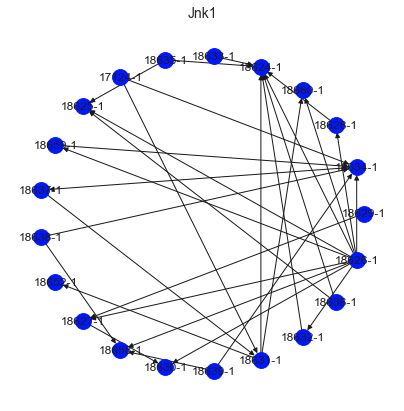

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Absolutes
18629-1, -7.85
18634-1, -8.65
18628-1, -7.19
18660-1, -10.51
18624-1, -7.13
18633-1, -7.62
18635-1, -7.15
17124-1, -9.68
18625-1, -6.46
18659-1, -8.18
18637-1, -9.31
18638-1, -9.17
18652-1, -10.25
18627-1, -7.91
18658-1, -9.50
18630-1, -7.64
18639-1, 3.67
18631-1, -8.88
18632-1, -8.13
18636-1, -6.74
18626-1, -8.40



 Cdk2 
14
17
-7.04
There are 1 simulations left to run: [(10, 9)]


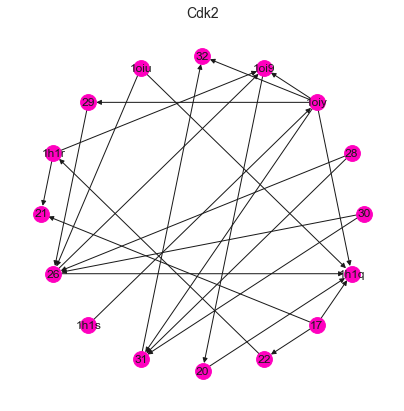

Absolutes
30, -8.72
28, -7.65
1oiy, -8.17
1oi9, -8.75
32, -9.88
1oiu, -9.95
29, -8.38
1h1r, -7.15
21, -6.85
26, -7.89
1h1s, -9.64
31, -7.98
20, -7.84
22, -6.95
17, -7.04
1h1q, -6.66



Targets completed: ['Thrombin', 'Mcl1', 'Jnk1', 'Cdk2']


In [3]:
targets = [Thrombin, Mcl1, Bace, Jnk1, Cdk2]
completed = []

for i, target in zip(np.linspace(0.,1.,len(targets)), targets):
    target.color = rainbow_cmap(i)


for target in targets:
    os.chdir(f'{base_directory}/{target.name.lower()}/results/')
    
    print(f'{color.BOLD}{color.RED} {target.name} {color.END}{color.END}')
    print(target.base_id)
    print(target.index_to_name[target.base_id])
    print(target.base_bfe)
    
    all_sims = []
    all_files = os.listdir()

    for file in [x for x in all_files if x[-3:] == '.pi']:
        x = pickle.load(open(file,'rb'))
        all_sims.append(x)

    missing = check_missing_results(target,all_sims)
    print(f'There are {len(missing)} simulations left to run: {missing}')
    if len(missing) == 0 :
        completed.append(target)


    import networkx as nx
    G = nx.DiGraph()

    for item in target.index_to_name:
        G.add_node(item,name=target.index_to_name[item])

    for sim in all_sims:
        a = int(sim.ligA)
        b = int(sim.ligB)
        try:
            G.add_edge(a,b,f_ij=sim.bindingdg/1.69,df_ij=sim.bindingddg/1.69,f_ij_es=sim.bindingdg_es/1.69,df_ij_es=sim.bindingddg_es/1.69)
        except TypeError:
            print(sim.directory)
    plt.figure(figsize=(7,7))
    plt.title(target.name,fontsize=14)
    nx.draw_circular(G,labels=target.index_to_name,node_color=target.color, node_size=250, cmap=plt.cm.gist_rainbow)
    plt.show()

    f_i, C = fortuna.optimize.mle(G)
    f_i = [target.base_bfe - x + f_i[target.base_id] for x in f_i]


    print('Absolutes')
    for node in G.nodes(data=True):
        G.node[node[0]]['f_i'] = f_i[node[0]]
        G.node[node[0]]['df_i'] = C[node[0],node[0]]
        print(f"{node[1]['name']}, {node[1]['f_i']:.2f}")
#     print()
#     print('Relatives')    
#     for a,b in target.index_pairs:
#         relative = f_i[b] - f_i[a]
#         print(f'{target.index_to_name[a]},{target.index_to_name[b]},{relative:.2f}')
    
              
    #
    f_i_es, C = fortuna.optimize.mle(G)
    f_i_es = [target.base_bfe - x + f_i[target.base_id] for x in f_i]

    for node in G.nodes(data=True):
        G.node[node[0]]['f_i_es'] = f_i_es[node[0]]
        G.node[node[0]]['df_i_es'] = C[node[0],node[0]]          
              
    target.all_sims = all_sims
              
    if len(missing) == 0:
        target.graph = G
    elif target is Cdk2:
        target.graph = G
        completed.append(target)
    print()
    print()
    print()
              
print(f'Targets completed: {[t.name for t in completed]}')

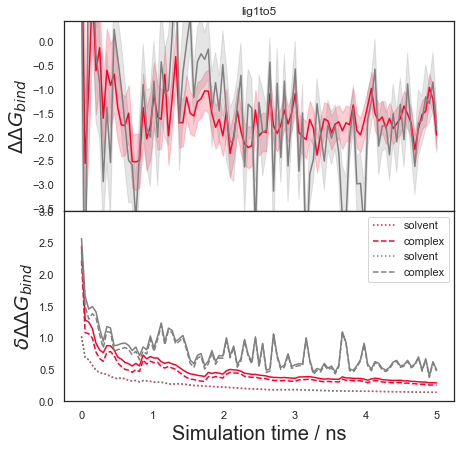

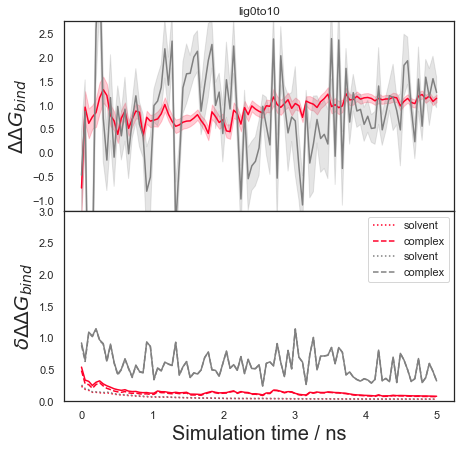

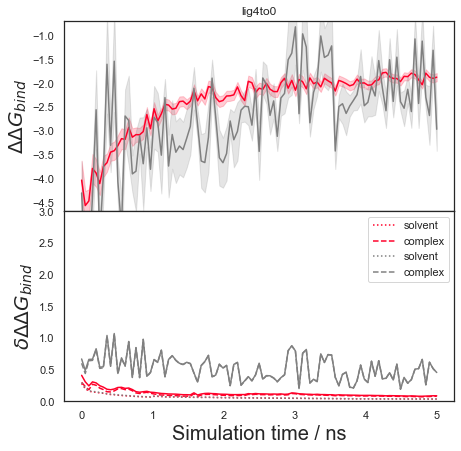

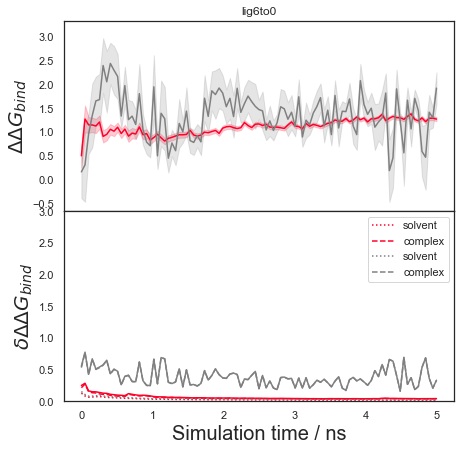

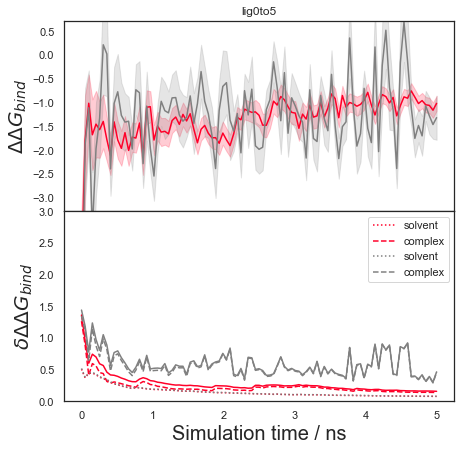

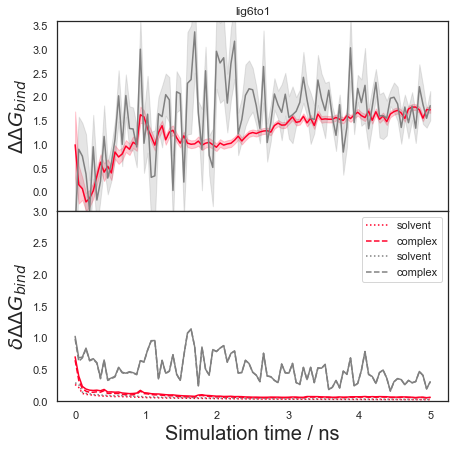

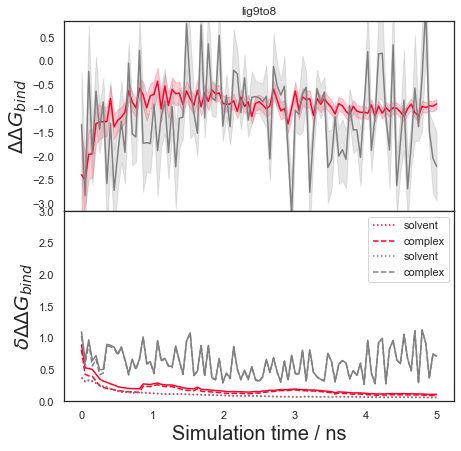

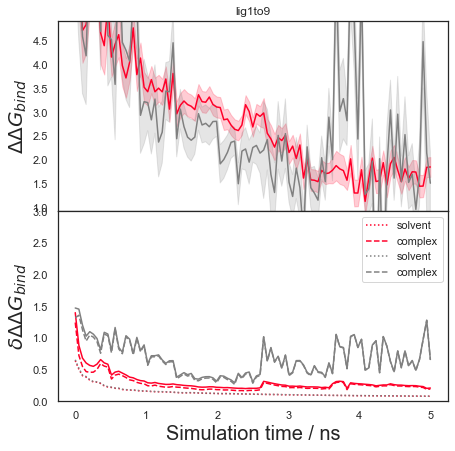

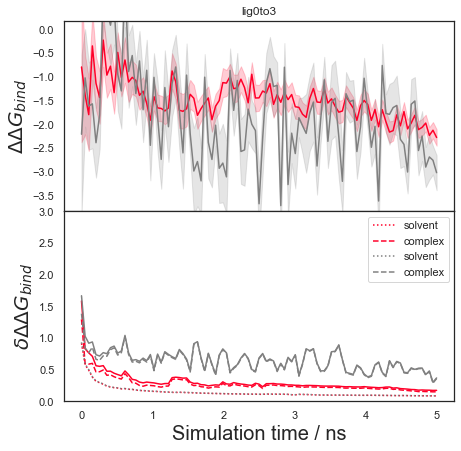

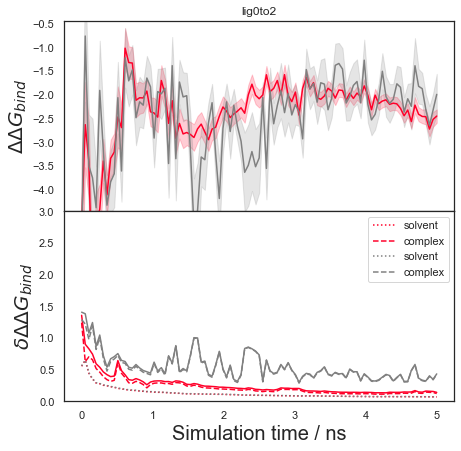

KeyboardInterrupt: 

In [4]:
for target in targets:
    for sim in target.all_sims:
        if len(sim.vacdg_history) == 0:
            continue
        f, (fe_fig, err_fig) = plt.subplots(2,1, sharex=True,figsize=(7,7))
        plt.subplots_adjust(hspace=0.0)
        fe_fig.set_title(f'{sim.directory}')

        bfe_history = np.asarray(sim.soldg_history) - np.asarray(sim.comdg_history)
        error_history = ((np.asarray(sim.solddg_history))**2 + (np.asarray(sim.comddg_history))**2)**0.5

        xaxis = np.linspace(0.,5.,len(bfe_history))
        
        fe_fig.plot(xaxis,bfe_history,color=target.color,label='without endstates')
        fe_fig.fill_between(xaxis,bfe_history - error_history, bfe_history + error_history, alpha = 0.2,color=target.color)
        err_fig.plot(xaxis,error_history,color=target.color)
        err_fig.plot(xaxis,sim.solddg_history,color=target.color,linestyle='dotted',label='solvent')
        err_fig.plot(xaxis,sim.comddg_history,color=target.color,linestyle='dashed',label='complex')

        # now plotting with endstates
        bfe_history = np.asarray(sim.soldg_history_es) - np.asarray(sim.comdg_history_es)
        error_history = ((np.asarray(sim.solddg_history_es))**2 + (np.asarray(sim.comddg_history_es))**2)**0.5

        fe_fig.plot(xaxis,bfe_history,color='gray',label='with endstates')
        fe_fig.fill_between(xaxis,bfe_history - error_history, bfe_history + error_history, alpha = 0.2,color='gray')
        err_fig.plot(xaxis,error_history,color='gray')
        err_fig.plot(xaxis,sim.solddg_history_es,color='gray',linestyle='dotted',label='solvent')
        err_fig.plot(xaxis,sim.comddg_history_es,color='gray',linestyle='dashed',label='complex')    


        err_fig.set_ylabel(r'$\delta \Delta \Delta G_{bind}$',fontsize=20)
        fe_fig.set_ylabel(r'$\Delta \Delta G_{bind}$',fontsize=20)
        plt.xlabel('Simulation time / ns',fontsize=20)
        mean = np.mean(bfe_history)
        fe_fig.set_ylim(mean-2.,mean+2.)
        err_fig.set_ylim(0.,3.)
        plt.legend()
        plt.show()

In [5]:
data = []

for target in targets:
    for sim in target.all_sims:
        try:
            var = ((np.asarray(sim.solddg))**2 + (np.asarray(sim.comddg))**2)**0.5
            eff = -np.log10(var)
            data.append([target.name,eff])
        except TypeError:
            print(f'error with {target.name}, {sim.directory}')
            continue

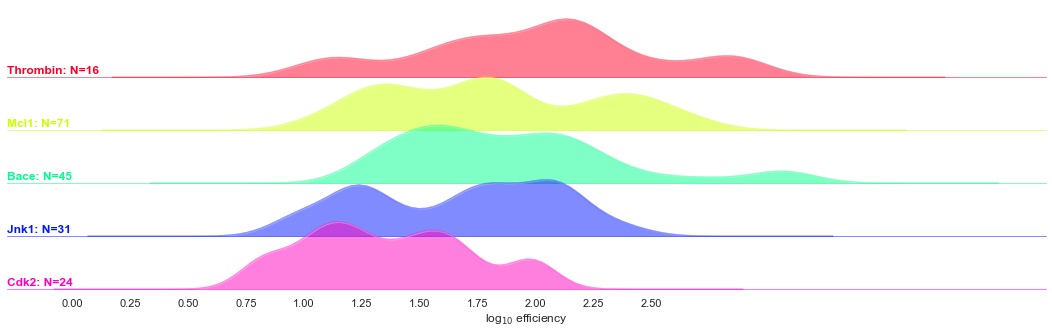

In [6]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# m = df.g.map(ord)

df = pd.DataFrame(data, columns = ['g', r'log$_{10}$ efficiency']) 
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal = [list(target.color) for target in targets]

g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, r'log$_{10}$ efficiency', clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.3)
g.map(sns.kdeplot, r'log$_{10}$ efficiency', clip_on=False, color="w", lw=0.1, bw=.3)
g.map(plt.axhline, y=0, lw=1, alpha=0.5, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    target = globals()[label]
    color = target.color
    ax = plt.gca()
    ax.text(0, 0.1, f'{label}: N={len(target.all_sims)}', fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, r'log$_{10}$ efficiency')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.set(xticks=list(np.linspace(0.,2.5,11)))
# g.set(xlabel='efficiency')
g.despine(bottom=True, left=True)
plt.show()

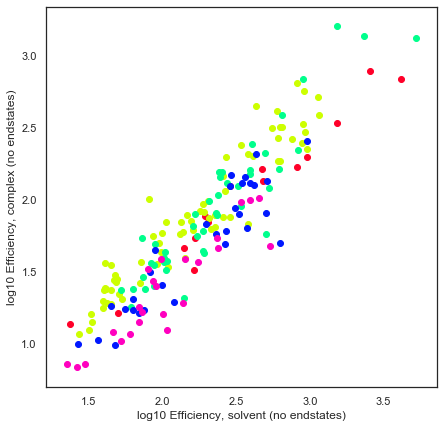

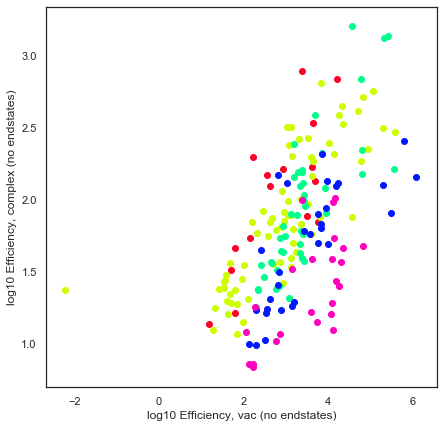

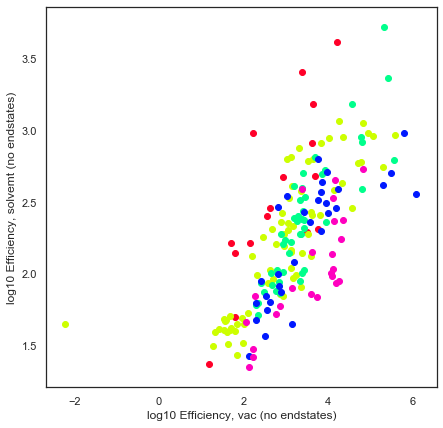

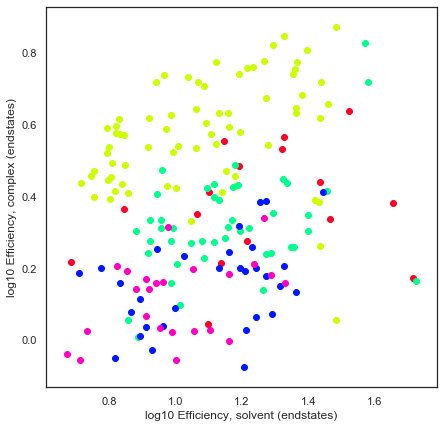

In [7]:
plt.figure(figsize=(7,7))
for target in targets:
    for sim in target.all_sims:
        plt.scatter(-np.log10(sim.solddg),-np.log10(sim.comddg),color=target.color)
plt.xlabel('log10 Efficiency, solvent (no endstates)')
plt.ylabel('log10 Efficiency, complex (no endstates)')
plt.show()

plt.figure(figsize=(7,7))
for target in targets:
    for sim in target.all_sims:
        plt.scatter(-np.log10(sim.vacddg),-np.log10(sim.comddg),color=target.color)
plt.xlabel('log10 Efficiency, vac (no endstates)')
plt.ylabel('log10 Efficiency, complex (no endstates)')
plt.show()

plt.figure(figsize=(7,7))
for target in targets:
    for sim in target.all_sims:
        plt.scatter(-np.log10(sim.vacddg),-np.log10(sim.solddg),color=target.color)
plt.xlabel('log10 Efficiency, vac (no endstates)')
plt.ylabel('log10 Efficiency, solvemt (no endstates)')
plt.show()

plt.figure(figsize=(7,7))
for target in targets:
    for sim in target.all_sims:
        plt.scatter(-np.log10(sim.soldf_ij[0,-1]),-np.log10(sim.comdf_ij[0,-1]),color=target.color)
plt.xlabel('log10 Efficiency, solvent (endstates)')
plt.ylabel('log10 Efficiency, complex (endstates)')
plt.show()

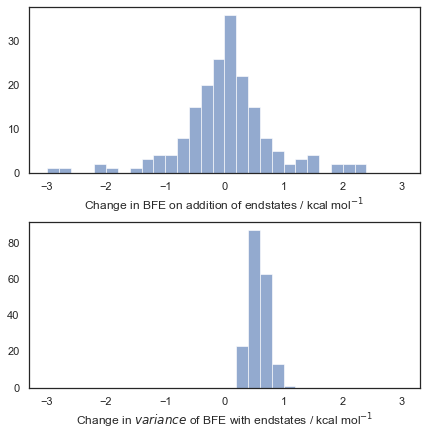

In [8]:
n_y = 2
n_x = 1
size = 7
fig = plt.figure(figsize=[7,7])


shiftdg = []
shiftddg = []
bins = np.linspace(-3,3,31)
for target in targets:
    for sim in target.all_sims:
        shiftdg.append(sim.bindingdg_es-sim.bindingdg)
        shiftddg.append(sim.bindingddg_es-sim.bindingddg)
        
xlabels = [r'Change in BFE on addition of endstates / kcal mol$^{-1}$',
            r'Change in $variance$ of BFE with endstates / kcal mol$^{-1}$']      
for plot_index,method in enumerate([shiftdg, shiftddg],1):   
    plt.subplot(n_y, n_x, plot_index)
    plt.hist(method,bins=bins,alpha=0.6)
    plt.xlabel(xlabels[plot_index-1])
plt.subplots_adjust(hspace=0.3)
plt.show()

In [9]:
pd.options.display.float_format = '{:,.2f}'.format
os.chdir('/Users/brucemah/bin/jacs-dataset-analysis')
def read_dataset():
    """Read the dataset
    
    Code from Pat Walters:
    https://github.com/PatWalters/FEP_TI_Comparison/blob/master/fep_ti_analysis.ipynb

    Returns
    -------
    master_df : pandas.Dataframe
       dataframe containing DeltaG values (kcal/mol) for all targets
    """
    def get_data_from_sheet(xls,sheet_name,col_names):
        df = xls.parse(sheet_name=sheet_name,header=None)
        ligand_names = df[df.columns[10]]
        df = df[df.columns[17:22]]
        df.columns = col_names
        df.dropna(inplace=True)
        df = df.query("EXP > -20")
        rows,_ = df.shape
        df.insert(0,"Target",[sheet_name]*rows)
        # the following is a horrible check to make sure that Mcl1 ligand names aren't treated as floats
        if isinstance(ligand_names[0:rows][0], float):
            df.insert(1,"ID",[f"{sheet_name}_{int(x)}" for x in ligand_names[0:rows]])
        else:
            df.insert(1,"ID",[f"{sheet_name}_{x}" for x in ligand_names[0:rows]])
        return df

    xls = pd.ExcelFile("amber-ti/FEP_vs_GTI-dG-SI.xlsx")
    sheet_names = xls.sheet_names

    col_names = ["EXP","FEP","TI","PERSES1","PERSES2"]
    master_df = pd.DataFrame(columns=["Target","ID"]+col_names)
    for sheet in sheet_names:
        if sheet in [t.name.lower() for t in completed]:
            tmp_df = get_data_from_sheet(xls,sheet,col_names)
            master_df = master_df.append(tmp_df,ignore_index=True)
    master_df.sort_values("Target",inplace=True)

    return master_df

df = read_dataset()

In [10]:
for each, rows in df.groupby("Target"):
    target = globals()[each.capitalize()]
    target.exp_mean = np.mean(rows['EXP'])

In [11]:
for target in completed:
    target.calc_mean = np.mean([x[1]['f_i'] for x in target.graph.nodes(data=True)])
    for node in target.graph.nodes(data=True):
        node[1]['f_i'] = node[1]['f_i'] - target.calc_mean + target.exp_mean

In [12]:
####
# This block adds in our results into the dataframe, for targets that are finished
####



abs_dict = {}
for target in completed:
    print(target.name)
    for node in target.graph.nodes(data=True):
        abs_dict[target.name.lower()+'_'+node[1]['name']] = node[1]['f_i']

for i, row in df.iterrows(): 
    if row['ID'] in abs_dict:
        df.set_value(i,'PERSES1',abs_dict[row['ID']])

Thrombin
Mcl1
Jnk1
Cdk2


/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [13]:
def bootstrap_statistic(y_true, y_pred, ci=0.95, statistic='RMSE', nbootstrap = 1000, plot_type='dG'):
    """Compute mean and confidence intervals of specified statistic.
    
    Parameters
    ----------
    y_true : ndarray with shape (N,)
        True values
    y_pred : ndarray with shape (N,)
        Predicted values
    ci : float, optional, default=0.95
        Interval for CI
    statistic : str
        Statistic, one of ['RMSE', 'MUE', 'R2', 'rho']
    nbootstrap : int, optional, default=1000
        Number of bootstrap samples
    plot_type : str, optional, default='dG'
        'dG' or 'ddG'
        
    Returns
    -------
    rmse_stats : dict of floeat
        'mean' : mean RMSE
        'stderr' : standard error
        'low' : low end of CI
        'high' : high end of CI
    """
    
    def compute_statistic(y_true_sample, y_pred_sample, statistic):
        """Compute requested statistic.
        
        Parameters
        ----------
        y_true : ndarray with shape (N,)
            True values
        y_pred : ndarray with shape (N,)
            Predicted values
        statistic : str
            Statistic, one of ['RMSE', 'MUE', 'R2', 'rho']
            
        """
        if statistic == 'RMSE':
            return np.sqrt(sklearn.metrics.mean_squared_error(y_true_sample, y_pred_sample))
        elif statistic == 'MUE':
            return sklearn.metrics.mean_absolute_error(y_true_sample, y_pred_sample)
        elif statistic == 'R2':
#             return sklearn.metrics.r2_score(y_true_sample, y_pred_sample)
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_true_sample, y_pred_sample)
            return r_value**2
        elif statistic == 'rho':
            return scipy.stats.pearsonr(y_true_sample, y_pred_sample)[0]
        else:
            raise Exception("unknown statistic '{}'".format(statistic))
            
    def unique_differences(x):
        """Compute all unique differences"""
        N = len(x)
        return np.array( [ (x[i] - x[j]) for i in range(N) for j in range(N) if (i != j) ] )        
            
    assert len(y_true) == len(y_pred)
    sample_size = len(y_true)
    s_n = np.zeros([nbootstrap], np.float64) # s_n[n] is the statistic computed for bootstrap sample n
    for replicate in range(nbootstrap):
        indices = np.random.choice(np.arange(sample_size), size=[sample_size])
        if plot_type == 'dG':
            y_true_sample, y_pred_sample = y_true[indices], y_pred[indices]
        elif plot_type == 'ddG':
            y_true_sample, y_pred_sample = unique_differences(y_true[indices]), unique_differences(y_pred[indices])
        s_n[replicate] = compute_statistic(y_true_sample, y_pred_sample, statistic)
                
    rmse_stats = dict()
    if plot_type == 'dG':
        rmse_stats['mean'] = compute_statistic(y_true, y_pred, statistic)
    elif plot_type == 'ddG':
        rmse_stats['mean'] = compute_statistic(unique_pairs(y_true), unique_pairs(y_pred), statistic)        
    rmse_stats['stderr'] = np.std(s_n)
    
    # TODO: Is there a canned method to do this?
    s_n = np.sort(s_n)
    low_frac = (1.0-ci)/2.0
    high_frac = 1.0 - low_frac
    rmse_stats['low'] = s_n[int(np.floor(nbootstrap*low_frac))]
    rmse_stats['high'] = s_n[int(np.ceil(nbootstrap*high_frac))]

    return rmse_stats

In [14]:
def compute_ddGs(df):
    """Construct a new dataframe with ddGs for all ligand pairs within each target.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The master dG dataframe
        
    Returns
    -------
    ddG_df : pandas.DataFrame
        A new dataframe containing all ddGs within each target
        
    """
    ddG_df = pd.DataFrame(columns=['Target', 'ID1', 'ID2', 'EXP', 'FEP', 'TI','PERSES1','PERSES2'])
    index = 0
    for each, rows in df.groupby("Target"):
        for i, row_i in rows.iterrows():
            for j, row_j in rows.iterrows():
                if i > j:
                    ddG_df.loc[index] = [
                        each, row_i['ID'], row_j['ID'], 
                        row_j['EXP'] - row_i['EXP'], 
                        row_j['FEP'] - row_i['FEP'], 
                        row_j['TI'] - row_i['TI'],
                        row_j['PERSES1'] - row_i['PERSES1'],
                        row_j['PERSES2'] - row_i['PERSES2']
                    ]
                    index += 1
    return ddG_df
            

# Plot data by system
def plot_data(rows, title, plot_type='dG',color='gray'):
    """
    Plot predicted vs experimental ddG for FEP+ and AMBER TI.
    
    Parameters
    ----------
    title : str
        Plot title
    rows : pd.Dataframe
        Pandas dataframe containing 'EXP', 'FEP', and 'TI' columns
    plot_type : str
        Either 'dG' or 'ddG'
        
    """
    if plot_type == 'ddG':
        # Compute all unique differences
        rows = compute_ddGs(rows)       
        
    methods = ['FEP', 'TI','PERSES1']
    sns.set_style('white')
    sns.set_style('ticks')
    n_y = 1
    n_x = 3
    size = 7
    fig = plt.figure(figsize=[n_x*size,n_y*size])
    
    for plot_index,method in enumerate(methods,1):   
        plt.subplot(n_y, n_x, plot_index)
        
        nsamples = len(rows['EXP'].values)
        xmin = min([rows[x].values.min() for x in ['FEP', 'TI','PERSES1']]) - 0.5
        xmax = max([rows[x].values.max() for x in ['FEP', 'TI','PERSES1']]) + 0.5
        if plot_type == 'ddG':        
            xmax = + (max(abs(xmin), abs(xmax)) + 0.5)
            xmin = - xmax
            plt.xlabel('experiment $\Delta \Delta G$ (kcal/mol)',fontsize='large');
            plt.ylabel('predicted $\Delta \Delta G$ (kcal/mol)',fontsize='large');
        elif plot_type == 'dG':
            plt.xlabel('experiment $\Delta G$ (kcal/mol)',fontsize='large');
            plt.ylabel('predicted $\Delta G$ (kcal/mol)',fontsize='large');
        else:
            raise ValueError('Unknown plot type {}'.format(plot_type))

        plt.plot([xmin, xmax], [xmin, xmax], 'k-',alpha=0.5);
        
        if plot_type == 'ddG':
            plt.plot([0, 0], [xmin, xmax], 'k:');
            plt.plot([xmin, xmax], [0, 0], 'k:');
        if plot_type == 'ddG':
            plt.plot(rows['EXP'].values, rows[method].values,'.',color=color);
            plt.plot(-rows['EXP'].values, -rows[method].values,'.',color=color);
        elif plot_type == 'dG':
            plt.plot(rows['EXP'].values, rows[method].values,'.',color=color,markersize=10);

        # Compute error statistics
        stats = { 
            (method,statistic) : bootstrap_statistic(rows['EXP'].values, rows[method].values, statistic=statistic) 
            for statistic in ('RMSE', 'MUE', 'R2', 'rho') 
        }
        
        if plot_type == 'ddG': 
            title = ''
            # Label plot with error statistics
            title = """{} (N = {})
            RMSE: {}  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
            MUE : {}  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
            """.format(title, nsamples,
                       method,stats[(method,'RMSE')]['mean'], stats[(method,'RMSE')]['low'], stats[(method,'RMSE')]['high'],

                       method,stats[(method,'MUE')]['mean'], stats[(method,'MUE')]['low'], stats[(method,'MUE')]['high']
                      )
            plt.title(title, fontsize=11, loc='right', horizontalalignment='right', family='monospace');
            plt.subplots_adjust(hspace = 0.3)
        elif plot_type == 'dG': 
            title = ''
            # Label plot with error statistics
            title = """{} (N = {})
            RMSE: {}  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
            MUE : {}  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
            R2  : {}  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
            rho : {}  {:5.2f} [95%: {:5.2f}, {:5.2f}] kcal/mol
            """.format(title, nsamples,
                       method,stats[(method,'RMSE')]['mean'], stats[(method,'RMSE')]['low'], stats[(method,'RMSE')]['high'],

                       method,stats[(method,'MUE')]['mean'], stats[(method,'MUE')]['low'], stats[(method,'MUE')]['high'],

                       method,stats[(method,'R2')]['mean'], stats[(method,'R2')]['low'], stats[(method,'R2')]['high'],

                       method,stats[(method,'rho')]['mean'], stats[(method,'rho')]['low'], stats[(method,'rho')]['high'],
                       )
            plt.title(title, fontsize=11, loc='right', horizontalalignment='right', family='monospace');
            plt.subplots_adjust(hspace = 0.4)            
            
        plt.axis('square');
        plt.xlim(xmin, xmax);
        plt.ylim(xmin, xmax);

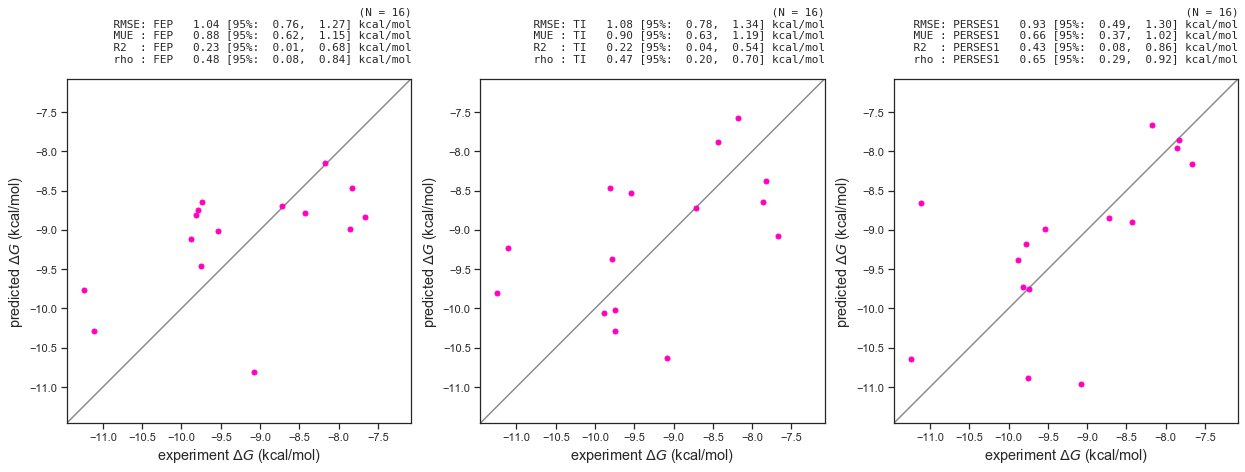

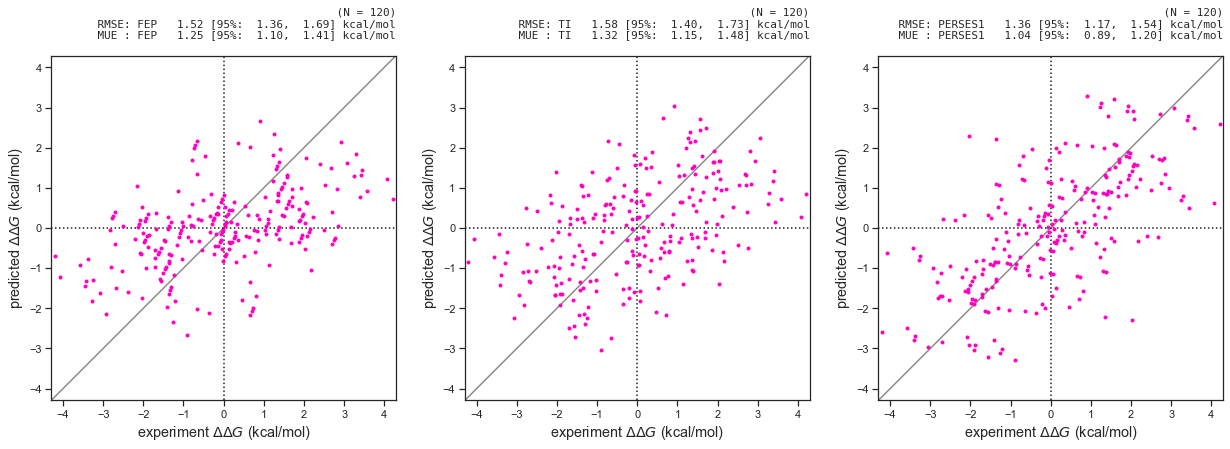

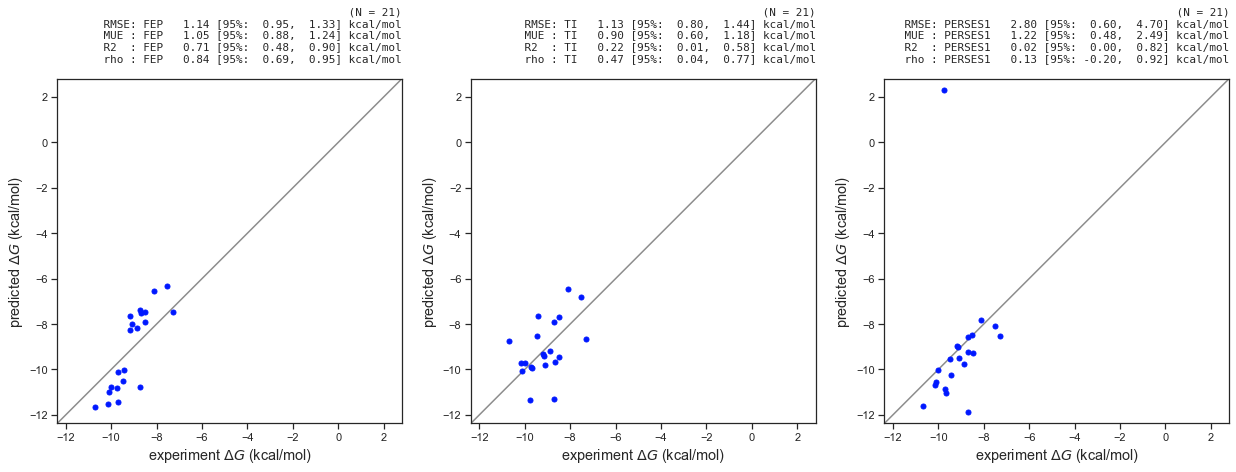

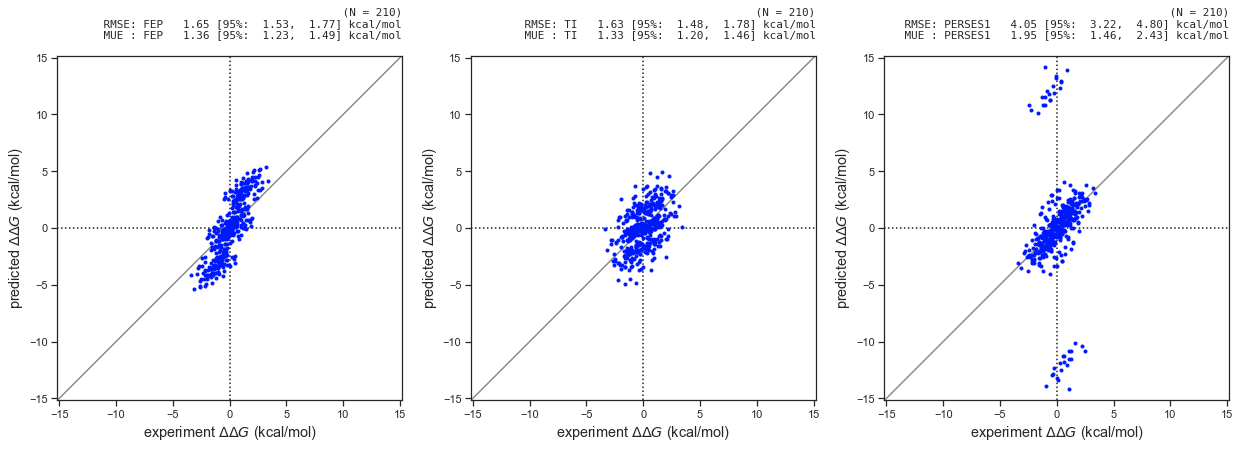

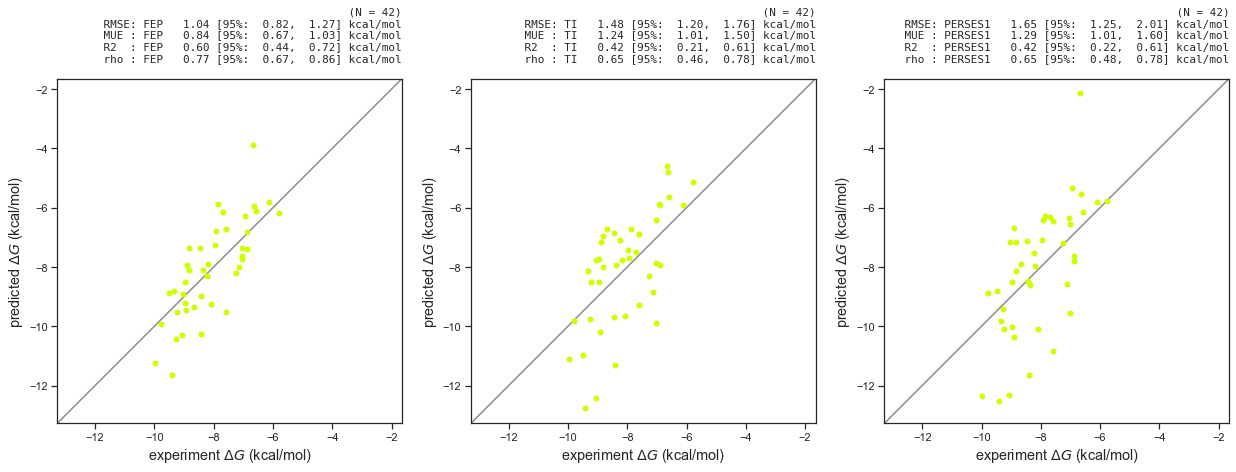

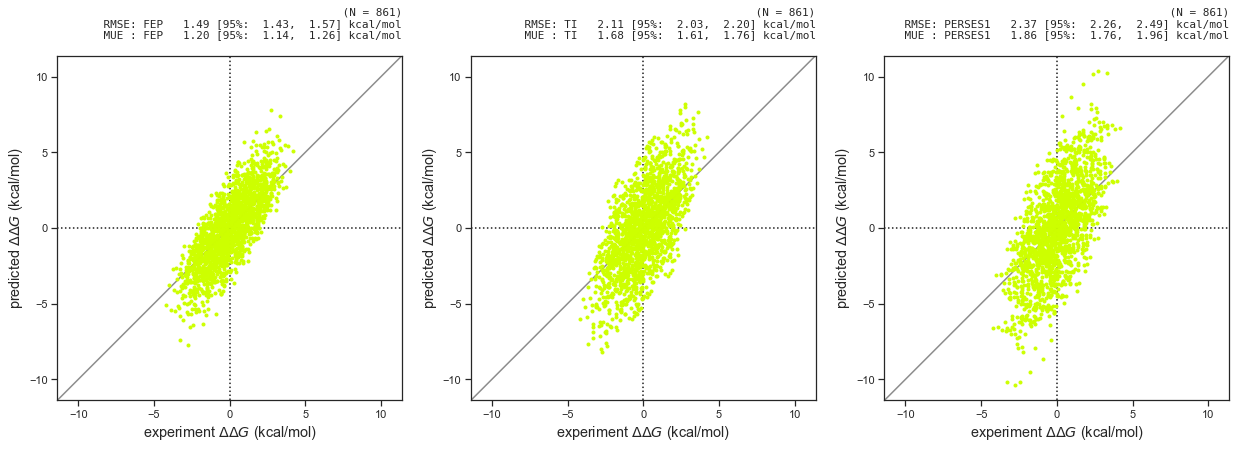

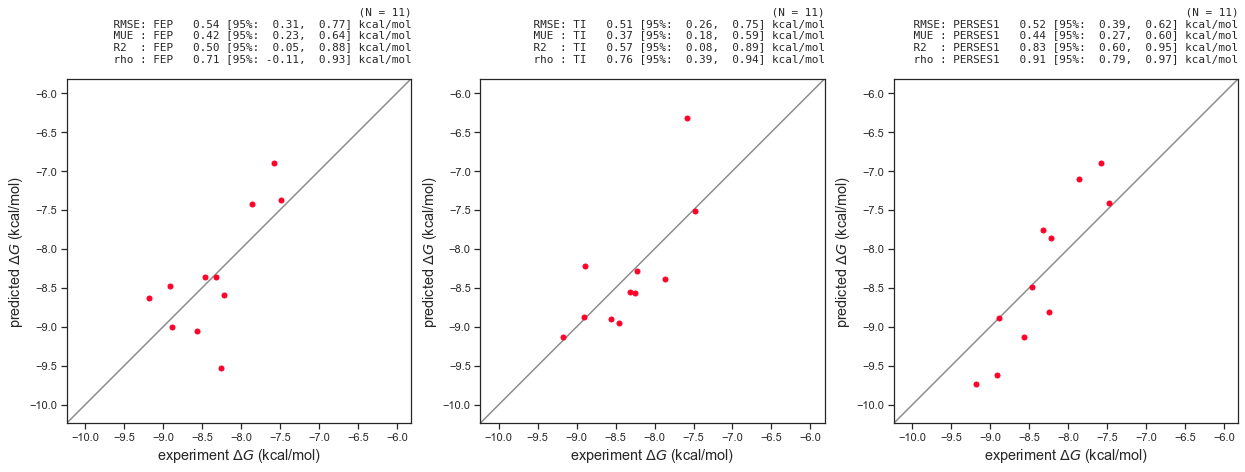

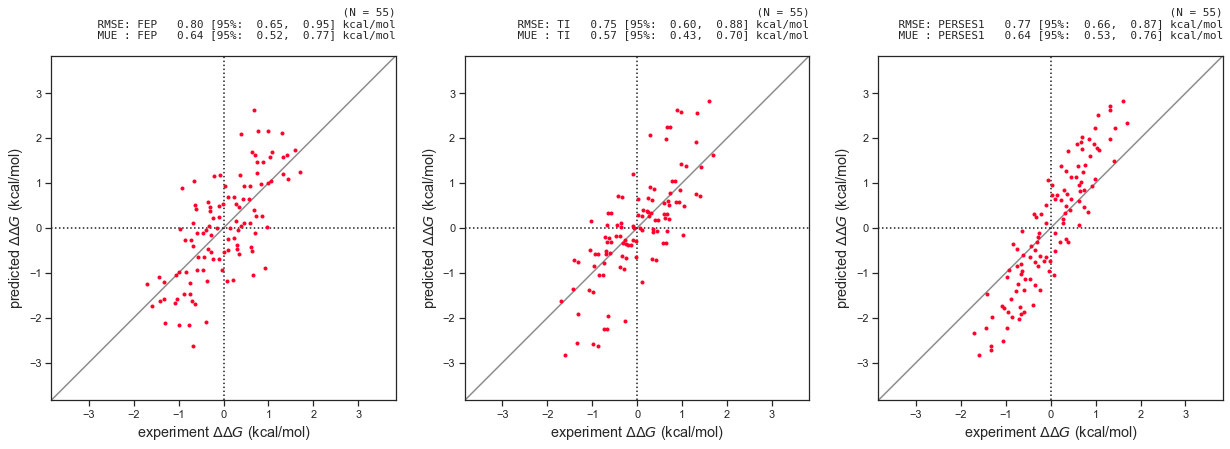

In [15]:
# Plot dG and ddG between all ligand pairs
for each, rows in df.groupby("Target"): 
    if each in [t.name.lower() for t in completed]:
        target = globals()[each.capitalize()]
        plot_data(rows, each + ' all-pairs ΔG', plot_type='dG',color=target.color)
        plot_data(rows, each + ' all-pairs ΔΔG', plot_type='ddG',color=target.color)

In [16]:
for i, row in df.iterrows():
    target = globals()[row['Target'].capitalize()]
    name = row['ID'].split('_')[1]
    index = target.name_to_index[name]
    target.graph.nodes[index]['exp'] = row['EXP']

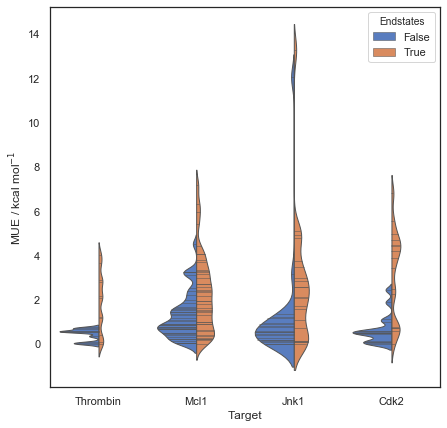

In [17]:
plt.figure(figsize=(7,7))
sns.set_style("white")

MUEdf = pd.DataFrame(columns=['Target','MUE','Endstates'])
colors=[]

for target in completed:
    for node in target.graph.nodes(data=True):
        no_es = np.abs(node[1]['exp'] - node[1]['f_i'])
        es = np.abs(node[1]['exp'] - node[1]['f_i_es'])
        MUEdf = MUEdf.append({'Target':target.name,'MUE':no_es,'Endstates':False},ignore_index=True)
        MUEdf = MUEdf.append({'Target':target.name,'MUE':es,'Endstates':True},ignore_index=True)
    colors.append(target.color)
sns.violinplot(x='Target',y='MUE',data=MUEdf,hue='Endstates', split=True,
               bw=0.2,palette='muted',inner="stick",linewidth=1.)
plt.ylabel(r'MUE / kcal mol$^{-1}$')
plt.xlabel('Target')
plt.show()        

In [ ]:
shift = []
colors=[]

for target in completed:
    target_shift = []
    for node in target.graph.nodes(data=True):
        no_es = np.abs(node[1]['exp'] - node[1]['f_i'])
        es = np.abs(node[1]['exp'] - node[1]['f_i_es'])
        target_shift.append(es - no_es)
    shift.append(target_shift)
    colors.append(target.color)
    
plt.figure(figsize=(7,7))
sns.set_style("white")
plt.vlines(0., -0.5, 3.5,linestyles='dashed',color='gray',alpha=0.5)
print('If shift = 0 the end states do nothing. If positive, es moving it further from experimental')
sns.violinplot(data=shift,label=['Mcl1','Jnk','throm'],orient='h',palette=colors,inner='points')
plt.xlabel('Distance to experimental')
plt.show()

In [ ]:
Jnk1.index_to_name[16]

In [ ]:
plt.clf()
for sim in Jnk1.all_sims:
    if 'lig16to1' == sim.directory:
        plt.plot(sim.vacf_ij[0][1:-2] - sim.vacf_ij[0][1],label='vac')
        plt.plot(sim.solf_ij[0][1:-2] - sim.solf_ij[0][1],label='sol')
        plt.plot(sim.comf_ij[0][1:-2] - sim.comf_ij[0][1],label='com')
        plt.plot((sim.comf_ij[0][1:-2] - sim.comf_ij[0][1])-(sim.solf_ij[0][1:-2] - sim.solf_ij[0][1]),label='bfe')
plt.legend()
plt.show()

plt.clf()
for sim in Jnk1.all_sims:
    if 'lig16to14' == sim.directory:
        plt.plot(sim.vacf_ij[0][1:-2] - sim.vacf_ij[0][1],label='vac')
        plt.plot(sim.solf_ij[0][1:-2] - sim.solf_ij[0][1],label='sol')
        plt.plot(sim.comf_ij[0][1:-2] - sim.comf_ij[0][1],label='com')
        plt.plot((sim.comf_ij[0][1:-2] - sim.comf_ij[0][1])-(sim.solf_ij[0][1:-2] - sim.solf_ij[0][1]),label='bfe')
plt.legend()
plt.show()